# Libraries

In [1]:
# install.packages('h2o')

In [2]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



# Without one hot encoding

## Read data

In [11]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 8 - Deep Learning/Section 39 - Artificial Neural Networks (ANN)"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Churn_Modelling.csv')[c('Geography','Gender','Age','CreditScore','EstimatedSalary',
                                     'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
                                     'Exited')]
str(df)

'data.frame':	10000 obs. of  11 variables:
 $ Geography      : Factor w/ 3 levels "France","Germany",..: 1 3 1 1 3 3 1 2 1 1 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 2 2 1 2 2 ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance        : num  0 83808 159661 0 125511 ...
 $ NumOfProducts  : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard      : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


## Factorize an numerize features

In [4]:
df$Geography=as.numeric(factor(df$Geography))
df$Gender=as.numeric(factor(df$Gender))
str(df)

'data.frame':	10000 obs. of  11 variables:
 $ Geography      : num  1 3 1 1 3 3 1 2 1 1 ...
 $ Gender         : num  1 1 1 1 1 2 2 1 2 2 ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance        : num  0 83808 159661 0 125511 ...
 $ NumOfProducts  : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard      : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


## Scale

In [5]:
scale_features=c('Geography','Gender','Age','CreditScore','EstimatedSalary',
                 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember')
df[,scale_features]=scale(df[,scale_features])
str(df)

'data.frame':	10000 obs. of  11 variables:
 $ Geography      : num  -0.902 1.515 -0.902 -0.902 1.515 ...
 $ Gender         : num  -1.1 -1.1 -1.1 -1.1 -1.1 ...
 $ Age            : num  0.2935 0.19815 0.2935 0.00746 0.38885 ...
 $ CreditScore    : num  -0.326 -0.44 -1.537 0.501 2.064 ...
 $ EstimatedSalary: num  0.0219 0.2165 0.2407 -0.1089 -0.3653 ...
 $ Tenure         : num  -1.04 -1.39 1.03 -1.39 -1.04 ...
 $ Balance        : num  -1.226 0.117 1.333 -1.226 0.786 ...
 $ NumOfProducts  : num  -0.912 -0.912 2.527 0.808 -0.912 ...
 $ HasCrCard      : num  0.646 -1.548 0.646 -1.548 0.646 ...
 $ IsActiveMember : num  0.97 0.97 -1.03 -1.03 0.97 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


## Train/test

In [6]:
set.seed(123)
split=sample.split(df$Exited, SplitRatio=0.8)
training_set=subset(df,split)
test_set=subset(df,!split)
writeLines(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

Training set: 8000x11
Test set: 2000x11


## Artificial Neural Network

In [7]:
h2o.init(nthreads=-1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmp6CmQnl/h2o_ggomarr_started_from_r.out
    /tmp/Rtmp6CmQnl/h2o_ggomarr_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 859 milliseconds 
    H2O cluster version:        3.10.5.3 
    H2O cluster version age:    1 month and 5 days  
    H2O cluster name:           H2O_started_from_R_ggomarr_iiw313 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.3.2 (2016-10-31) 




=== ANN ===
  |======================================================================| 100%
  |======================================================================| 100%

Classifier summary:
Model Details:

H2ORegressionModel: deeplearning
Model Key:  DeepLearning_model_R_1501853168543_1 
Status of Neuron Layers: predicting Exited, regression, gaussian distribution, Quadratic loss, 115 weights/biases, 5.7 KB, 200,224 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    10     Input  0.00 %                                              
2     2     6 Rectifier  0.00 % 0.000000 0.000000  0.000747 0.000295 0.000000
3     3     6 Rectifier  0.00 % 0.000000 0.000000  0.000400 0.000279 0.000000
4     4     1    Linear         0.000000 0.000000  0.000233 0.000103 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.063562   0.368509  0.257034 0.608200
3   -0.102029   0.

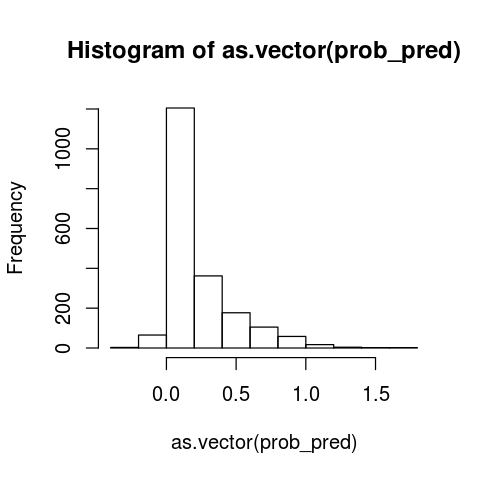

In [8]:
writeLines('\n=== ANN ===')
my_classifier=h2o.deeplearning(y='Exited',
                               training_frame=as.h2o(training_set),
                               activation='Rectifier',
                               hidden=c(6,6),
                               epochs=25,
                               train_samples_per_iteration=-2)
writeLines('\nClassifier summary:')
print(summary(my_classifier))
prob_pred=h2o.predict(my_classifier,newdata=as.h2o(test_set[-11]))
y_pred=as.vector(prob_pred>0.5)
writeLines('\nConfusion matrix:')
print(table(test_set$Exited,y_pred))
hist(as.vector(prob_pred))

In [9]:
h2o.shutdown(prompt=FALSE)

[1] TRUE

# With one hot encoding of Geography

## Read data

In [11]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 8 - Deep Learning/Section 39 - Artificial Neural Networks (ANN)"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Churn_Modelling.csv')[c('Geography','Gender','Age','CreditScore','EstimatedSalary',
                                     'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
                                     'Exited')]
str(df)

'data.frame':	10000 obs. of  11 variables:
 $ Geography      : Factor w/ 3 levels "France","Germany",..: 1 3 1 1 3 3 1 2 1 1 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 2 2 1 2 2 ...
 $ Age            : int  42 41 42 39 43 44 50 29 44 27 ...
 $ CreditScore    : int  619 608 502 699 850 645 822 376 501 684 ...
 $ EstimatedSalary: num  101349 112543 113932 93827 79084 ...
 $ Tenure         : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance        : num  0 83808 159661 0 125511 ...
 $ NumOfProducts  : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard      : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember : int  1 1 0 0 1 0 1 0 1 1 ...
 $ Exited         : int  1 0 1 0 0 1 0 1 0 0 ...


## Factorize an numerize features

In [22]:
df=cbind(data.frame(model.matrix(~Geography-1,df))[-1],df[,!(colnames(df)=='Geography')])
df$Gender=as.numeric(factor(df$Gender))
str(df)

'data.frame':	10000 obs. of  12 variables:
 $ GeographyGermany: num  0 0 0 0 0 0 0 1 0 0 ...
 $ GeographySpain  : num  0 1 0 0 1 1 0 0 0 0 ...
 $ Gender          : num  1 1 1 1 1 2 2 1 2 2 ...
 $ Age             : int  42 41 42 39 43 44 50 29 44 27 ...
 $ CreditScore     : int  619 608 502 699 850 645 822 376 501 684 ...
 $ EstimatedSalary : num  101349 112543 113932 93827 79084 ...
 $ Tenure          : int  2 1 8 1 2 8 7 4 4 2 ...
 $ Balance         : num  0 83808 159661 0 125511 ...
 $ NumOfProducts   : int  1 1 3 2 1 2 2 4 2 1 ...
 $ HasCrCard       : int  1 0 1 0 1 1 1 1 0 1 ...
 $ IsActiveMember  : int  1 1 0 0 1 0 1 0 1 1 ...
 $ Exited          : int  1 0 1 0 0 1 0 1 0 0 ...


## Scale

In [24]:
scale_features=c('GeographyGermany','GeographySpain','Gender','Age','CreditScore','EstimatedSalary',
                 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember')
df[,scale_features]=scale(df[,scale_features])
str(df)

'data.frame':	10000 obs. of  12 variables:
 $ GeographyGermany: num  -0.579 -0.579 -0.579 -0.579 -0.579 ...
 $ GeographySpain  : num  -0.574 1.743 -0.574 -0.574 1.743 ...
 $ Gender          : num  -1.1 -1.1 -1.1 -1.1 -1.1 ...
 $ Age             : num  0.2935 0.19815 0.2935 0.00746 0.38885 ...
 $ CreditScore     : num  -0.326 -0.44 -1.537 0.501 2.064 ...
 $ EstimatedSalary : num  0.0219 0.2165 0.2407 -0.1089 -0.3653 ...
 $ Tenure          : num  -1.04 -1.39 1.03 -1.39 -1.04 ...
 $ Balance         : num  -1.226 0.117 1.333 -1.226 0.786 ...
 $ NumOfProducts   : num  -0.912 -0.912 2.527 0.808 -0.912 ...
 $ HasCrCard       : num  0.646 -1.548 0.646 -1.548 0.646 ...
 $ IsActiveMember  : num  0.97 0.97 -1.03 -1.03 0.97 ...
 $ Exited          : int  1 0 1 0 0 1 0 1 0 0 ...


## Train/test

In [25]:
set.seed(123)
split=sample.split(df$Exited, SplitRatio=0.8)
training_set=subset(df,split)
test_set=subset(df,!split)
writeLines(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
writeLines(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

Training set: 8000x12
Test set: 2000x12


## Artificial Neural Network

In [26]:
h2o.init(nthreads=-1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmp6CmQnl/h2o_ggomarr_started_from_r.out
    /tmp/Rtmp6CmQnl/h2o_ggomarr_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 819 milliseconds 
    H2O cluster version:        3.10.5.3 
    H2O cluster version age:    1 month and 5 days  
    H2O cluster name:           H2O_started_from_R_ggomarr_iiw313 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.3.2 (2016-10-31) 




=== ANN ===
  |======================================================================| 100%
  |======================================================================| 100%

Classifier summary:
Model Details:

H2ORegressionModel: deeplearning
Model Key:  DeepLearning_model_R_1501854383382_1 
Status of Neuron Layers: predicting Exited, regression, gaussian distribution, Quadratic loss, 121 weights/biases, 5.9 KB, 219,643 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    11     Input  0.00 %                                              
2     2     6 Rectifier  0.00 % 0.000000 0.000000  0.000790 0.000999 0.000000
3     3     6 Rectifier  0.00 % 0.000000 0.000000  0.001105 0.002180 0.000000
4     4     1    Linear         0.000000 0.000000  0.000266 0.000094 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.043532   0.301908 -0.069972 0.611037
3   -0.060774   0.

Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Test/Validation dataset is missing column 'IsActiveMember': substituting in a column of NaN”


Confusion matrix:
   y_pred
       0    1
  0 1540   53
  1  253  154


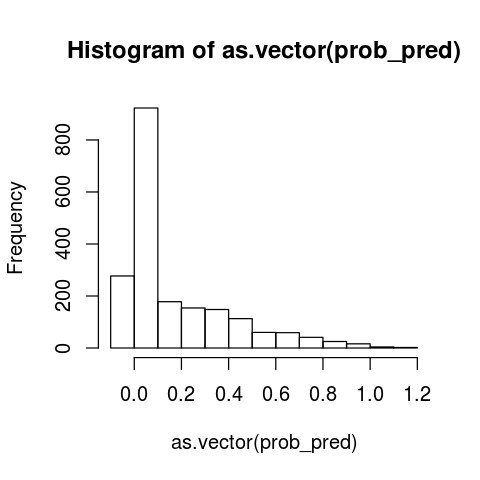

In [27]:
writeLines('\n=== ANN ===')
my_classifier=h2o.deeplearning(y='Exited',
                               training_frame=as.h2o(training_set),
                               activation='Rectifier',
                               hidden=c(6,6),
                               epochs=25,
                               train_samples_per_iteration=-2)
writeLines('\nClassifier summary:')
print(summary(my_classifier))
prob_pred=h2o.predict(my_classifier,newdata=as.h2o(test_set[-11]))
y_pred=as.vector(prob_pred>0.5)
writeLines('\nConfusion matrix:')
print(table(test_set$Exited,y_pred))
hist(as.vector(prob_pred))

In [28]:
h2o.shutdown(prompt=FALSE)

[1] TRUE